<a href="https://colab.research.google.com/github/Tanishasingh22/ML_ASSIGNMENT_3/blob/main/ML_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

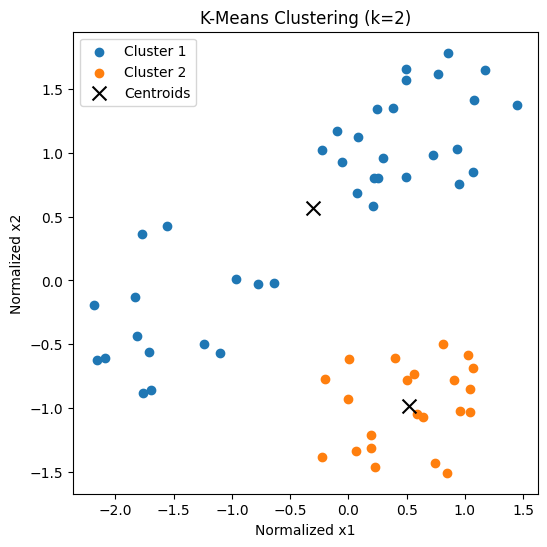

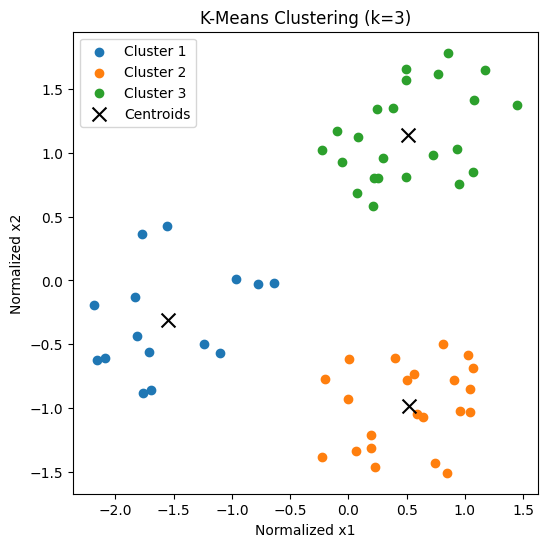

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/kmeans - kmeans_blobs (1).csv"
df = pd.read_csv(file_path)

# Normalize the dataset
def normalize_data(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Euclidean distance function
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# K-Means clustering implementation
def k_means_clustering(data, k, max_iters=100, tol=1e-4):
    np.random.seed(42)  # For reproducibility

    # Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        # Compute new centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)])

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    # Assign final clusters
    labels = np.zeros(data.shape[0])
    for idx, point in enumerate(data):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        labels[idx] = np.argmin(distances)

    return labels, centroids

# Normalize the dataset
normalized_data = normalize_data(df.values)

# Run K-Means for k=2 and k=3
for k in [2, 3]:
    labels, centroids = k_means_clustering(normalized_data, k)

    # Plot results
    plt.figure(figsize=(6, 6))
    for cluster_id in range(k):
        plt.scatter(
            normalized_data[labels == cluster_id, 0],
            normalized_data[labels == cluster_id, 1],
            label=f'Cluster {cluster_id + 1}'
        )

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

    plt.xlabel("Normalized x1")
    plt.ylabel("Normalized x2")
    plt.title(f'K-Means Clustering (k={k})')
    plt.legend()
    plt.show()
